In [1]:
import pandas as pd
import pandas_profiling 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#SKLearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score

from sklearn.datasets import load_iris
#helpers
%matplotlib inline

In [2]:
data = pd.read_csv('Demographic_Data.csv')
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


In [4]:
data[0:3] # Select rows 0, 1, 2 (row 3 is not selected)

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4


In [5]:
variable_name = data.iloc[:,0:4]

In [6]:
#features (don't use slicing in this instance, example used iloc slicing)
X = data[['age', 'items', 'amount', 'region']]
print('Summary of feature sample')
X.head()

Summary of feature sample


,age,items,amount,region
0,37,4,281.03,2
1,35,2,219.51,2
2,45,3,1525.70,4
3,46,3,715.25,3
4,33,4,1937.50,1


In [7]:
#dependent variable (example used region)
y = data['in-store']

In [8]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [9]:
#Modeling (Classification)
algo = DecisionTreeClassifier()
model = algo.fit(X_train,y_train)

In [10]:
#Predictions
preds = model.predict(X_test)

In [11]:
print(classification_report(y_test, preds))
#study precision, recall and differences, f1 is like an average of precision and recall. look at resources

              precision    recall  f1-score   support

           0       0.84      0.85      0.84     11831
           1       0.85      0.84      0.85     12169

    accuracy                           0.84     24000
   macro avg       0.84      0.85      0.84     24000
weighted avg       0.85      0.84      0.85     24000



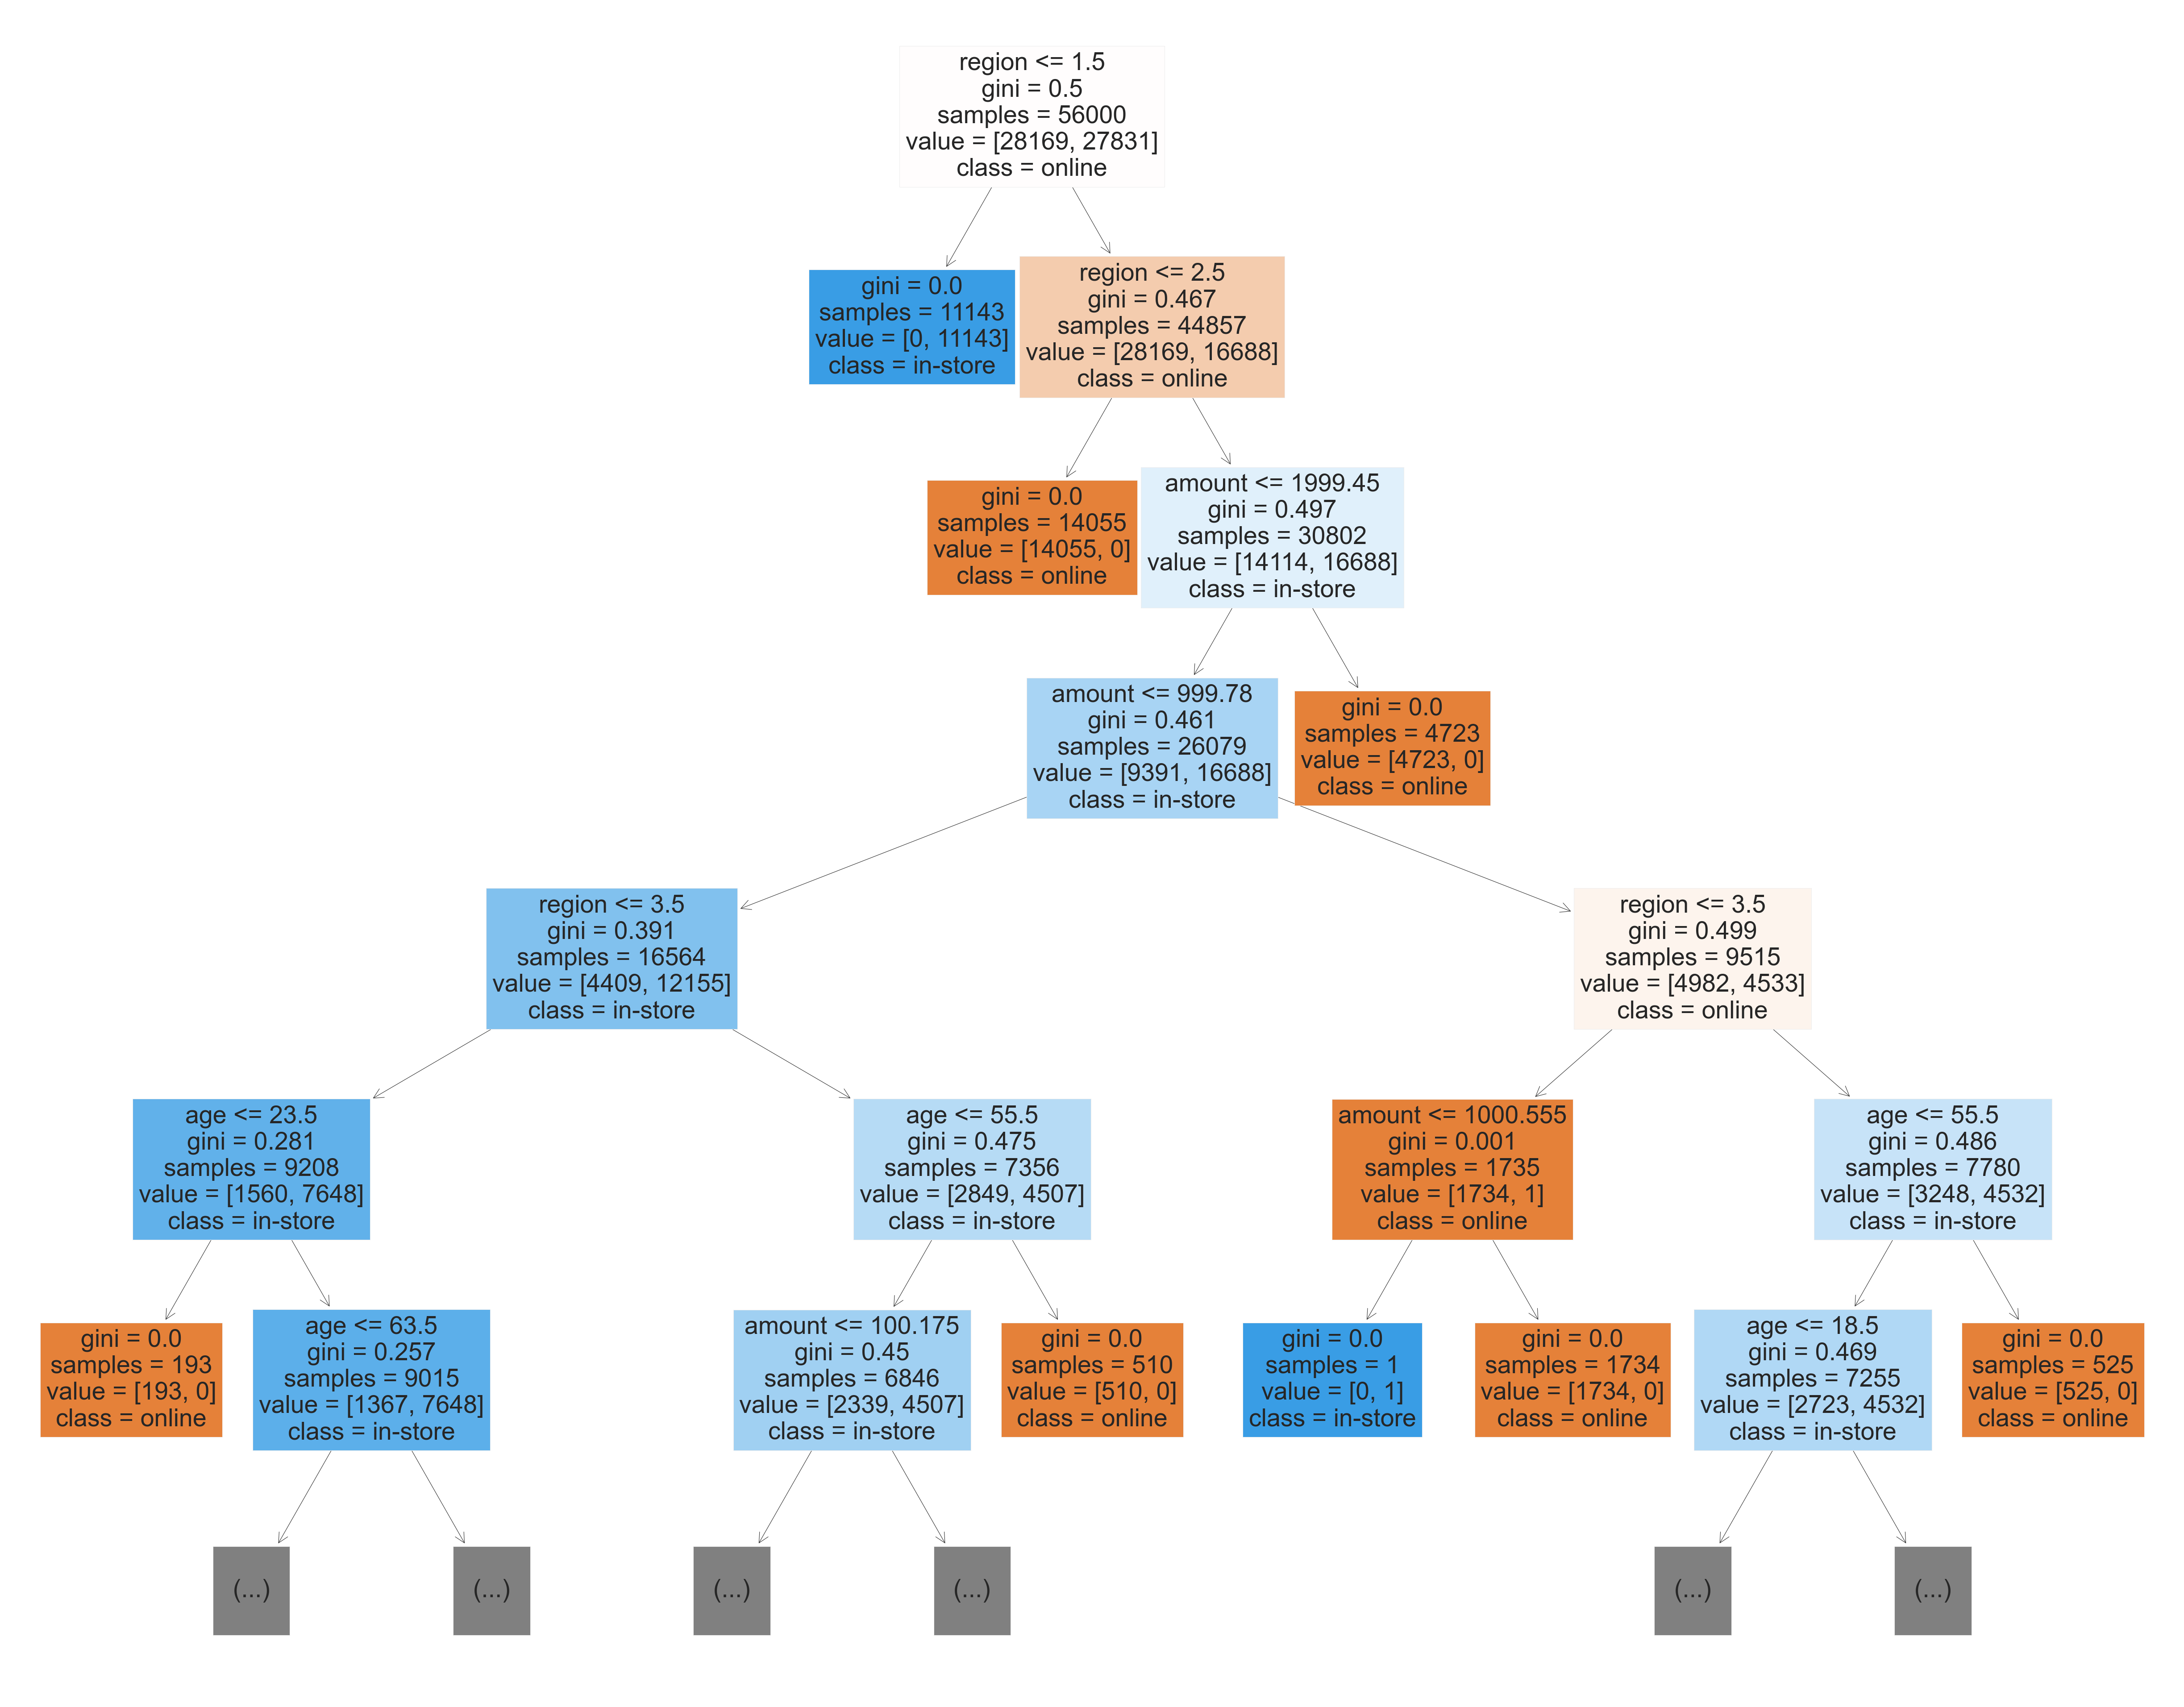

In [12]:
#Optional: If you'd like to visualize the decision tree built using 
#DecisionTreeClassifier(), you can use the following method for doing so; 
#this will help you answer the question(s) you've been asked for this task:

fig = plt.figure(figsize=(25,20), dpi=250)
tree = plot_tree(model, fontsize=16, feature_names=X.columns,class_names=['online', 'in-store'], 
                 max_depth=6, filled=True)


In [13]:
#The model shows that the in store purchases stay under 2k, north is all online and south is all in store

In [15]:
#Preventing overfitting (Learning the parameters of a prediction function and testing it on the same data is a 
#methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have 
#a perfect score but would fail to predict anything useful on yet-unseen data.)

In [16]:
#Cross validation
model = DecisionTreeClassifier()
print(cross_val_score(model, X, y, cv=3)) # cv = number of folds being held out

[0.84981438 0.84235197 0.84429611]


In [17]:
#The higher the average, the better the estimator will perform. 
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))

In [18]:
#classification
results = []
names = []
for name, model in algos_Class: result = cross_val_score(model, X,y, cv=3, scoring='accuracy')
names.append(name)
results.append(result)
for i in range(len(names)):
    print(names[i],results[i].mean())

Decision Tree Classifier 0.8458374863579037


In [19]:
#Based on what you've already learned about cross validation score, 
#which one would you choose for your final model and why?
#End of tutorial

In [20]:
#Are there differences in the age of customers between regions? 
#If so, can we predict the age of a customer in a region based on other demographic data?
    #Use decision tree and model above to answer this question

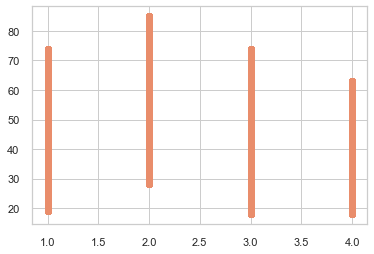

In [29]:
x = data['region']
y = data['age']
plt.scatter(x,y, marker='o')
plt.show()


Text(29.61165590277777, 0.5, 'Total Spent')

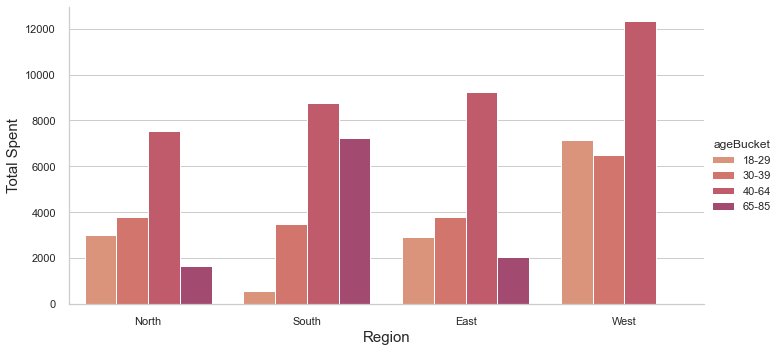

In [27]:
labels = ['North', 'South', 'East', 'West']
values = ["North" if x == 1 else 
          "South" if x == 2 else 
          "East" if x == 3 else 
          "West" if x == 4 else 
          x for x in data.region]
#set y labels to region names by using new variable
data.loc[data['region'] == 1, 'values'] = 'North'
data.loc[data['region'] == 2, 'values'] = 'South'
data.loc[data['region'] == 3, 'values'] = 'East'
data.loc[data['region'] == 4, 'values'] = 'West'
#set new variable to use mean per region using new region names
datag = data.groupby([values])['amount'].mean()
#Average_amount_by_age = demodata.groupby('age')['amount'].mean()

# Age buckets
def ageBucket(age):
    
    if age < 30:
        return '18-29'
    if age < 40:
        return '30-39'
    if age < 65:
        return '40-64'
    else:
        return '65-85'

data['ageBucket'] = data['age'].apply(ageBucket)

    
sns.catplot(x='values', data=data, kind='count', hue='ageBucket', order=['North','South','East','West'],
            hue_order=['18-29','30-39','40-64','65-85'], aspect=2)
sns.set_theme(style="whitegrid", palette="flare")
plt.xlabel('Region', fontsize=15)
plt.ylabel('Total Spent', fontsize=15)

In [ ]:
#We need to investigate Martin’s hypothesis: 
#Is there any correlation between age of a customer and if the transaction was made online or in the store? 
#Do any other factors predict if a customer will buy online or in our stores?
    #Run correlation between age and in store
    #Figure out what other model could be run for predicition of online purchases

In [28]:
#Create variable for each region and then run model for each region?
#Look at X train and figure out what exactly it does, same with test_size and random_state

correlation = data.corr()
print('Correlation')
print(correlation)
print('')

covariance = data.cov()
print('Covariance')
print(covariance)

Correlation
          in-store       age     items    amount    region
in-store  1.000000 -0.178256 -0.003954 -0.085474 -0.133114
age      -0.178256  1.000000  0.000679 -0.282089 -0.235446
items    -0.003954  0.000679  1.000000  0.000367 -0.001925
amount   -0.085474 -0.282089  0.000367  1.000000  0.403504
region   -0.133114 -0.235446 -0.001925  0.403504  1.000000

Covariance
           in-store          age     items         amount      region
in-store   0.250003    -1.400718 -0.004075     -30.825404   -0.074988
age       -1.400718   246.982562  0.021980   -3197.566591   -4.168901
items     -0.004075     0.021980  4.248703       0.545629   -0.004471
amount   -30.825404 -3197.566591  0.545629  520235.802331  327.903000
region    -0.074988    -4.168901 -0.004471     327.903000    1.269391


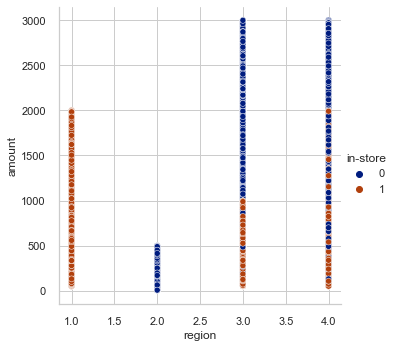

In [23]:
sns.set_theme(style="whitegrid", palette="dark")
sns.relplot(x= 'region', y= 'amount', hue='in-store', data= data)
plt.show()

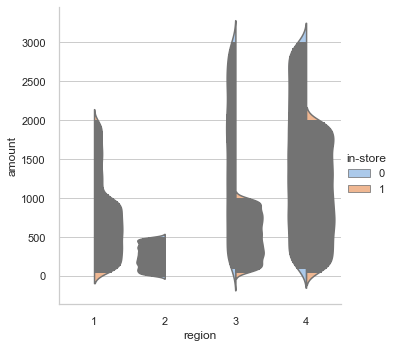

In [33]:
sns.catplot(x="region", y="amount", hue="in-store",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=data)
plt.show()